In [5]:
import pandas as pd

# Upload your file first via:
# from google.colab import files
# files.upload()

# Then load it by name
dataset = pd.read_csv("UCI_Credit_Card.csv")

# Drop unnecessary columns
dataset = dataset.drop("ID", axis=1)
dataset = dataset.drop(
    [
        "PAY_0", "PAY_2", "PAY_3",
        "BILL_AMT1", "BILL_AMT2", "BILL_AMT3",
        "PAY_AMT1", "PAY_AMT2", "PAY_AMT3"
    ],
    axis=1
)

print("✅ Dataset loaded and reduced.")


✅ Dataset loaded and reduced.


In [6]:
import numpy as np

if missing_values := (dataset == np.nan).sum().sum() == 0:
    print("No missing values detected in the dataset.")
else:
    print(f"{missing_values} missing values detected in the dataset")

No missing values detected in the dataset.


In [7]:
dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_4,PAY_5,PAY_6,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,-1,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,0,2,3272.0,3455.0,3261.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,14331.0,14948.0,15549.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,28314.0,28959.0,29547.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,20940.0,19146.0,19131.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,88004.0,31237.0,15980.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,0,0,8979.0,5190.0,0.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,-1,0,0,20878.0,20582.0,19357.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,0,0,-1,52774.0,11855.0,48944.0,1926.0,52964.0,1804.0,1


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def create_scatter_plot(data, feature1, feature2, feature3=None, alpha=0.5, figsize=(10, 8)):
    fig = plt.figure(figsize=figsize)

    colors = {0: 'blue', 1: 'red'}

    if feature3 is None:
        ax = fig.add_subplot(111)

        for class_value in [0, 1]:
            class_data = data[data['default.payment.next.month'] == class_value]
            ax.scatter(
                class_data[feature1],
                class_data[feature2],
                c=colors[class_value],
                alpha=alpha,
                label=f'Class {class_value}'
            )

        ax.set_xlabel(feature1)
        ax.set_ylabel(feature2)

    else:
        ax = fig.add_subplot(111, projection='3d')

        for class_value in [0, 1]:
            class_data = data[data['default.payment.next.month'] == class_value]
            ax.scatter(
                class_data[feature1],
                class_data[feature2],
                class_data[feature3],
                c=colors[class_value],
                alpha=alpha,
                label=f'Class {class_value}'
            )

        ax.set_xlabel(feature1)
        ax.set_ylabel(feature2)
        ax.set_zlabel(feature3)

    ax.legend()
    ax.set_title(f'Scatter plot of {feature1} vs {feature2}' +
                 (f' vs {feature3}' if feature3 else ''))

    ax.grid(True, alpha=0.3)

    plt.tight_layout()

    return fig, ax

def create_class_histogram(data, feature, bins=30, figsize=(12, 6)):
    fig, ax = plt.subplots(figsize=figsize)

    all_data = data[feature]

    min_val = all_data.min()
    max_val = all_data.max()

    class_0_data = data[data['default.payment.next.month'] == 0][feature]
    class_1_data = data[data['default.payment.next.month'] == 1][feature]

    bin_edges = np.histogram_bin_edges(all_data, bins=bins, range=(min_val, max_val))

    ax.hist(class_0_data, bins=bin_edges, alpha=0.5, label='No Default (0)', color='blue')
    ax.hist(class_1_data, bins=bin_edges, alpha=0.5, label='Default (1)', color='red')

    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {feature} by Class')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()

    return fig, ax


def show_feature_distribution(data, feature, figsize=(18, 10)):
    fig, axes = plt.subplots(2, 1, figsize=figsize)

    plot_data = pd.DataFrame()

    all_data = data[feature].copy()
    all_data.name = 'All Data'

    class0_data = data[data['default.payment.next.month'] == 0][feature].copy()
    class0_data.name = 'No Default (0)'

    class1_data = data[data['default.payment.next.month'] == 1][feature].copy()
    class1_data.name = 'Default (1)'

    boxplot_data = pd.concat([all_data, class0_data, class1_data], axis=1)
    sns.boxplot(data=boxplot_data, ax=axes[0], palette=['lightgray', 'blue', 'red'])
    axes[0].set_title(f'Boxplot of {feature} by Group')
    axes[0].set_ylabel(feature)

    sns.violinplot(data=boxplot_data, ax=axes[1], palette=['lightgray', 'blue', 'red'])
    axes[1].set_title(f'Violin Plot of {feature} by Group')
    axes[1].set_ylabel(feature)

    plt.tight_layout()

    return fig

def calculate_statistics(data, feature):
    stats_dict = {'Statistic': ['Count', 'Mean', 'Median', 'Mode', 'Std Dev',
                                'Variance', 'Min', '25%', '50%', '75%', 'Max',
                                'Skewness', 'Kurtosis']}

    for class_value in [0, 1]:
        class_data = data[data['default.payment.next.month'] == class_value][feature]

        class_stats = [
            len(class_data),
            np.mean(class_data),
            np.median(class_data),
            stats.mode(class_data, keepdims=True)[0][0],
            np.std(class_data),
            np.var(class_data),
            np.min(class_data),
            np.percentile(class_data, 25),
            np.percentile(class_data, 50),
            np.percentile(class_data, 75),
            np.max(class_data),
            stats.skew(class_data),
            stats.kurtosis(class_data)
        ]

        stats_dict[f'Class {class_value}'] = class_stats

    stats_df = pd.DataFrame(stats_dict)

    return stats_df

def create_default_rate_heatmap(data, feature1, feature2):
    default_rates = data.groupby([feature1, feature2])['default.payment.next.month'].mean().reset_index()

    pivot_table = default_rates.pivot(index=feature1, columns=feature2, values='default.payment.next.month')

    pivot_table = pivot_table * 100

    count_matrix = pd.crosstab(data[feature1], data[feature2])

    fig, ax = plt.subplots(figsize=(12, 10))
    heatmap = sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='seismic',
                         linewidths=0.5, ax=ax)

    ax.set_title(f'Default Rate (%) by {feature1} and {feature2}', fontsize=16)
    ax.set_xlabel(f'{feature2} (Payment Status)', fontsize=14)
    ax.set_ylabel(f'{feature1} (Payment Status)', fontsize=14)

    for i in range(len(pivot_table.index)):
        for j in range(len(pivot_table.columns)):
            try:
                count = count_matrix.iloc[i, j]
                ax.text(j + 0.5, i + 0.7, f'n={count}',
                       ha='center', va='center', color='black', alpha=0.7, fontsize=8)
            except:
                pass

    plt.tight_layout()

    return fig, ax


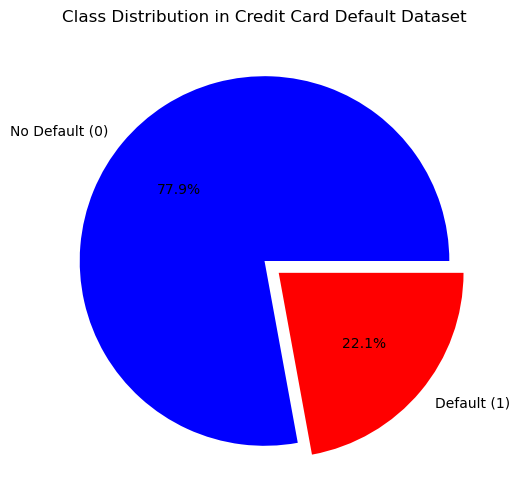

In [9]:
plt.figure(figsize=(8, 6))
plt.pie(dataset['default.payment.next.month'].value_counts(), labels=['No Default (0)', 'Default (1)'],
        autopct='%1.1f%%', colors=['blue', 'red'], explode=[0, 0.1])
plt.title('Class Distribution in Credit Card Default Dataset')
plt.show()

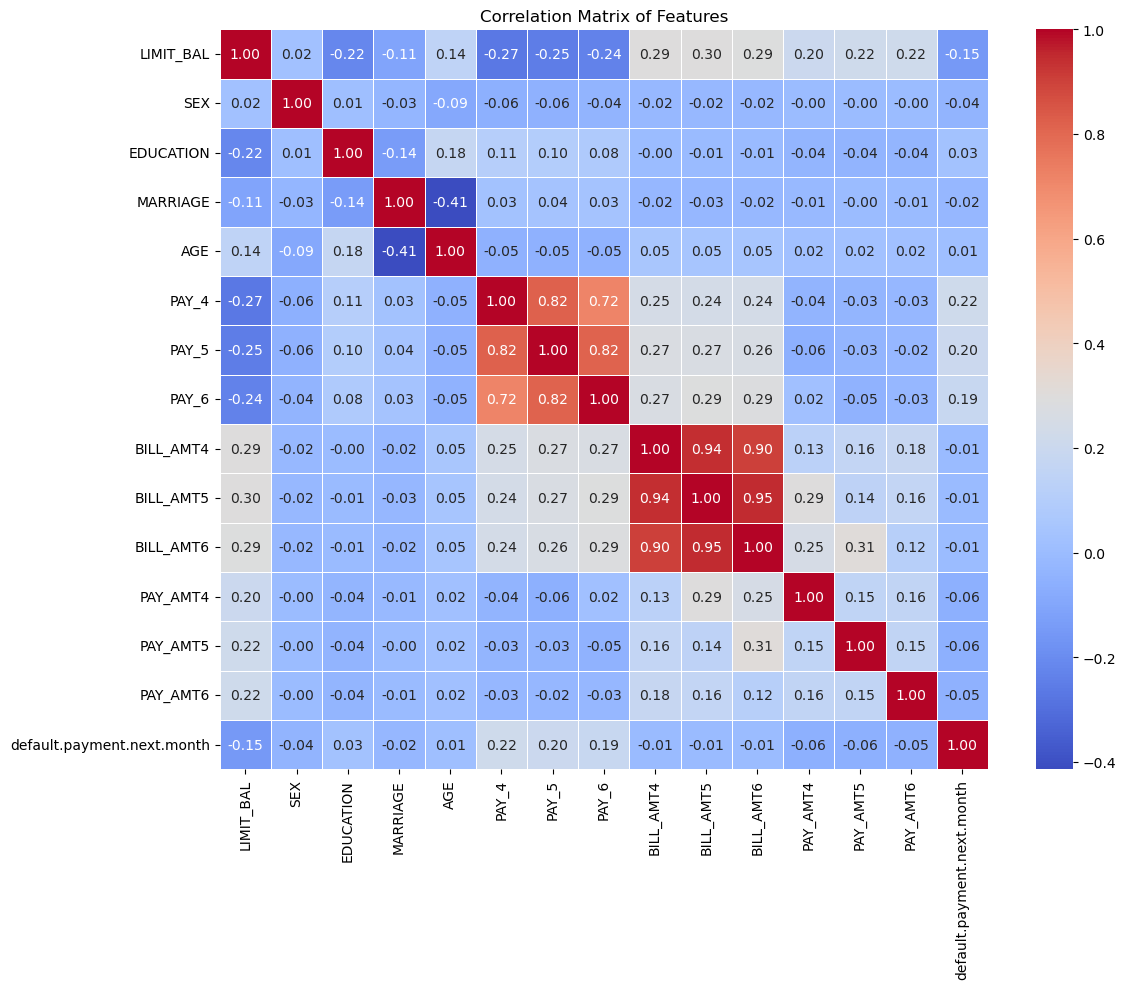

In [10]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

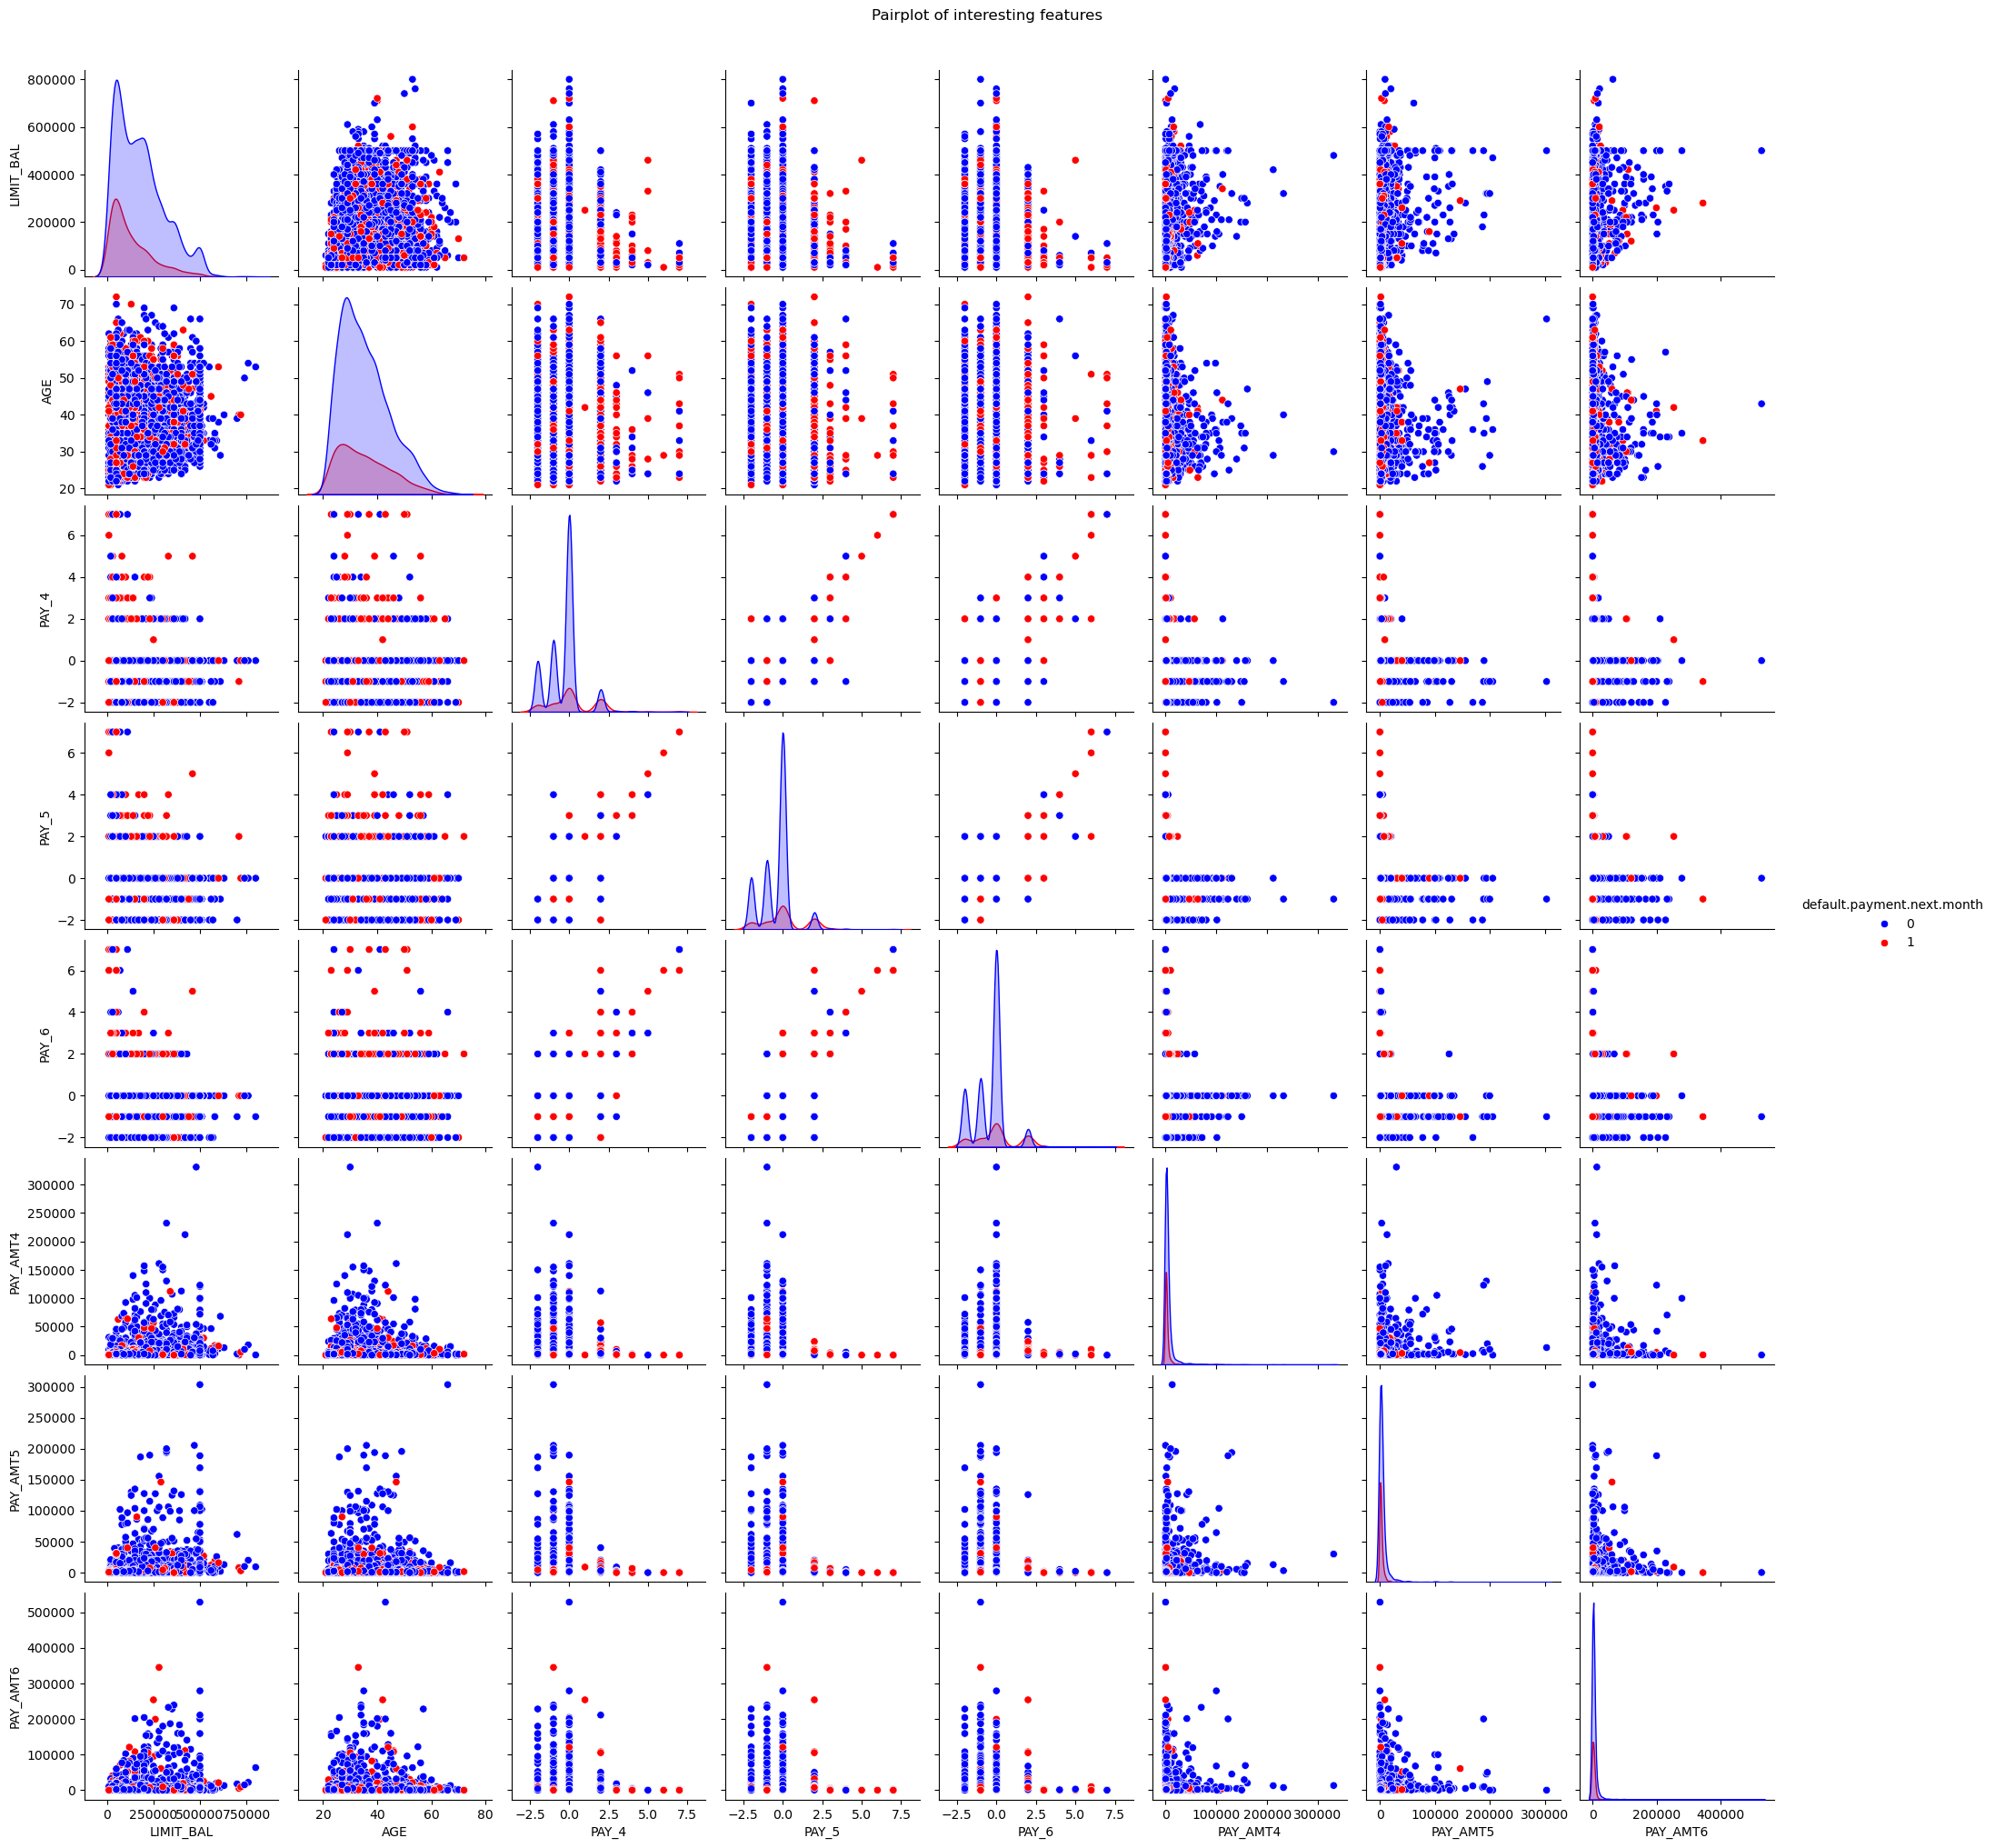

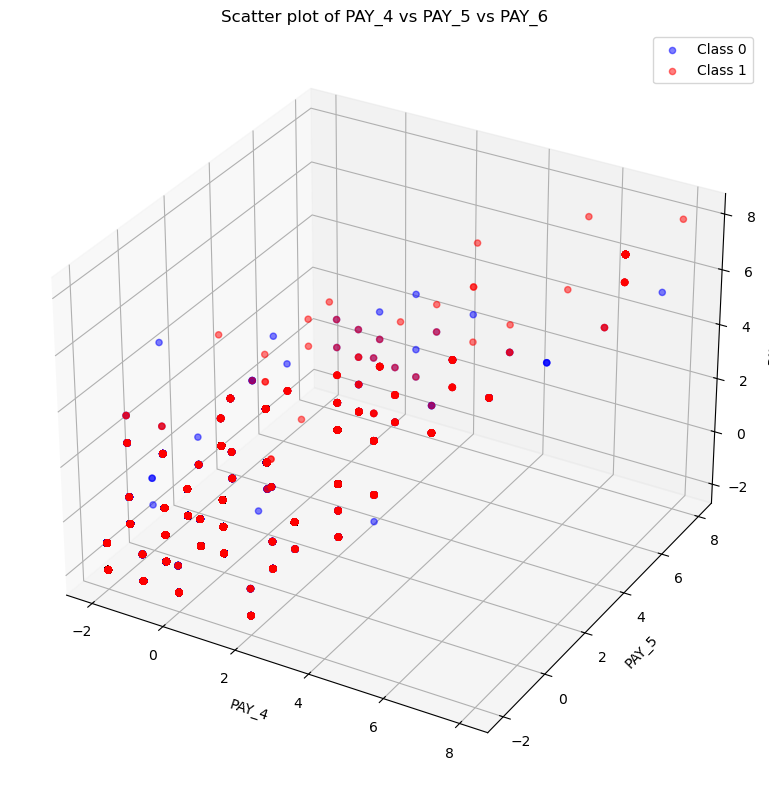

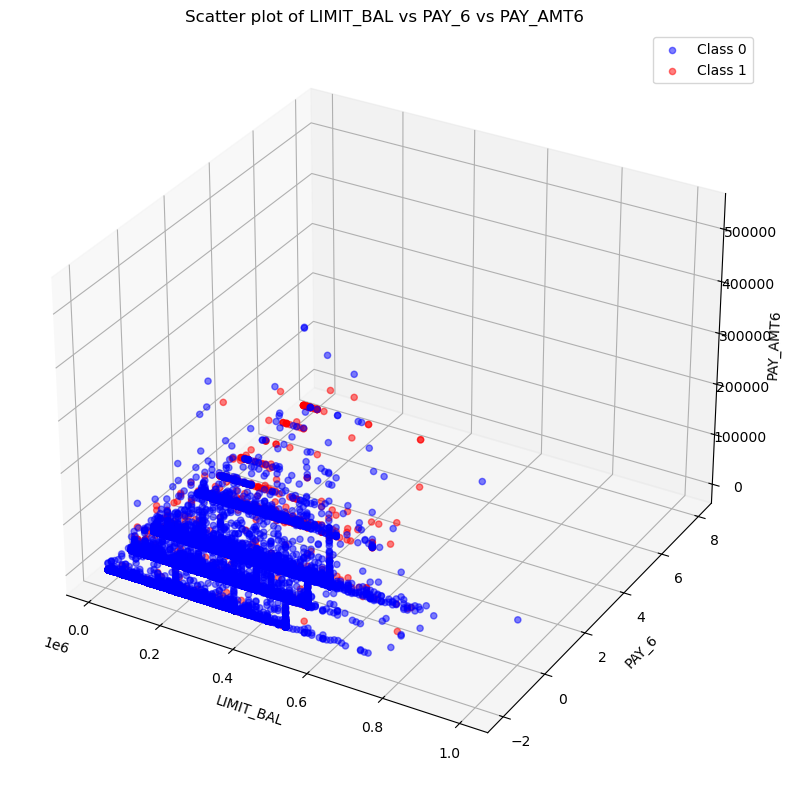

In [11]:
subset_data = dataset.sample(n=5000, random_state=42)

features_of_interest = ['LIMIT_BAL', 'AGE', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']
subset_features = subset_data[features_of_interest]

sns.pairplot(subset_features, hue='default.payment.next.month', palette={0: 'blue', 1: 'red'})
plt.suptitle('Pairplot of interesting features', y=1.02)
plt.show()

create_scatter_plot(dataset, 'PAY_4', 'PAY_5', 'PAY_6')
plt.show()

create_scatter_plot(dataset, 'LIMIT_BAL', 'PAY_6', 'PAY_AMT6')
plt.show()

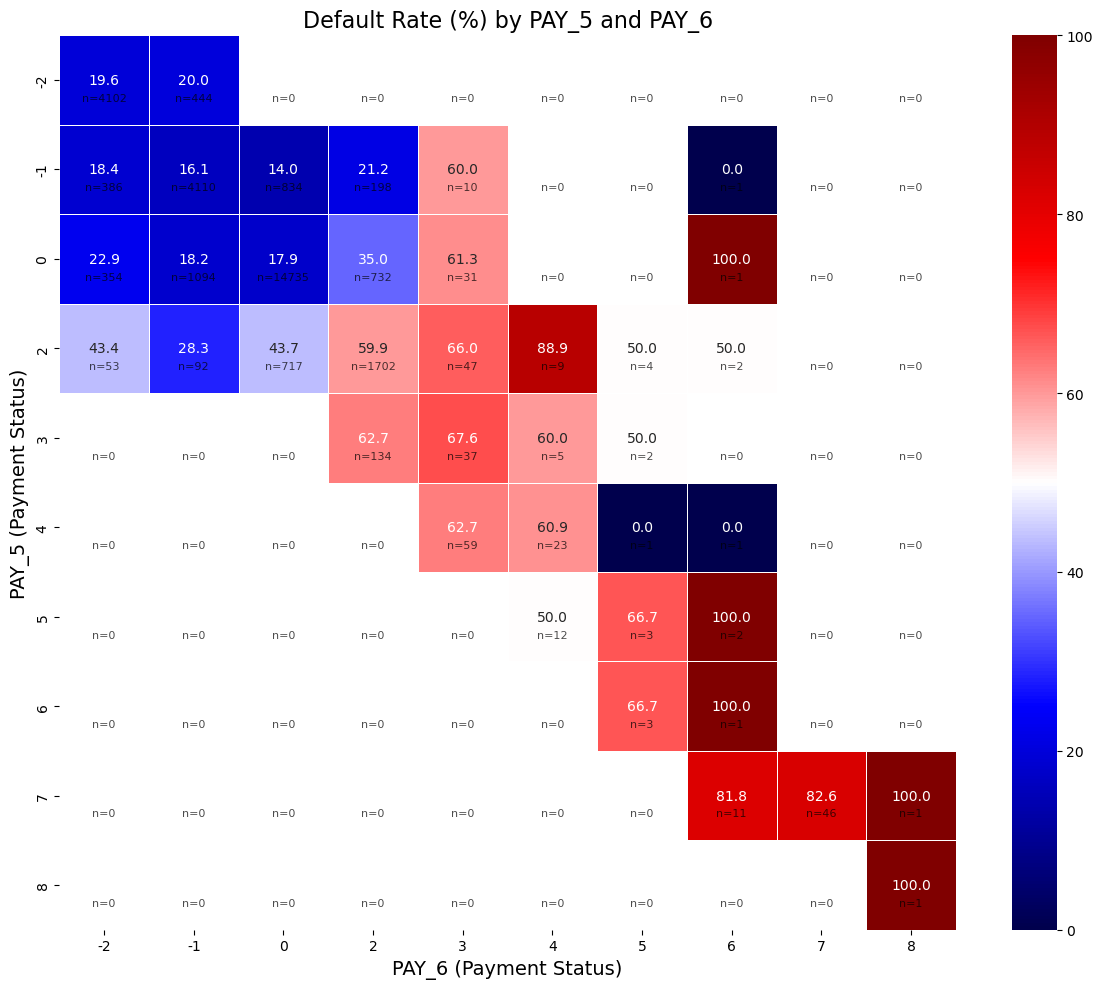

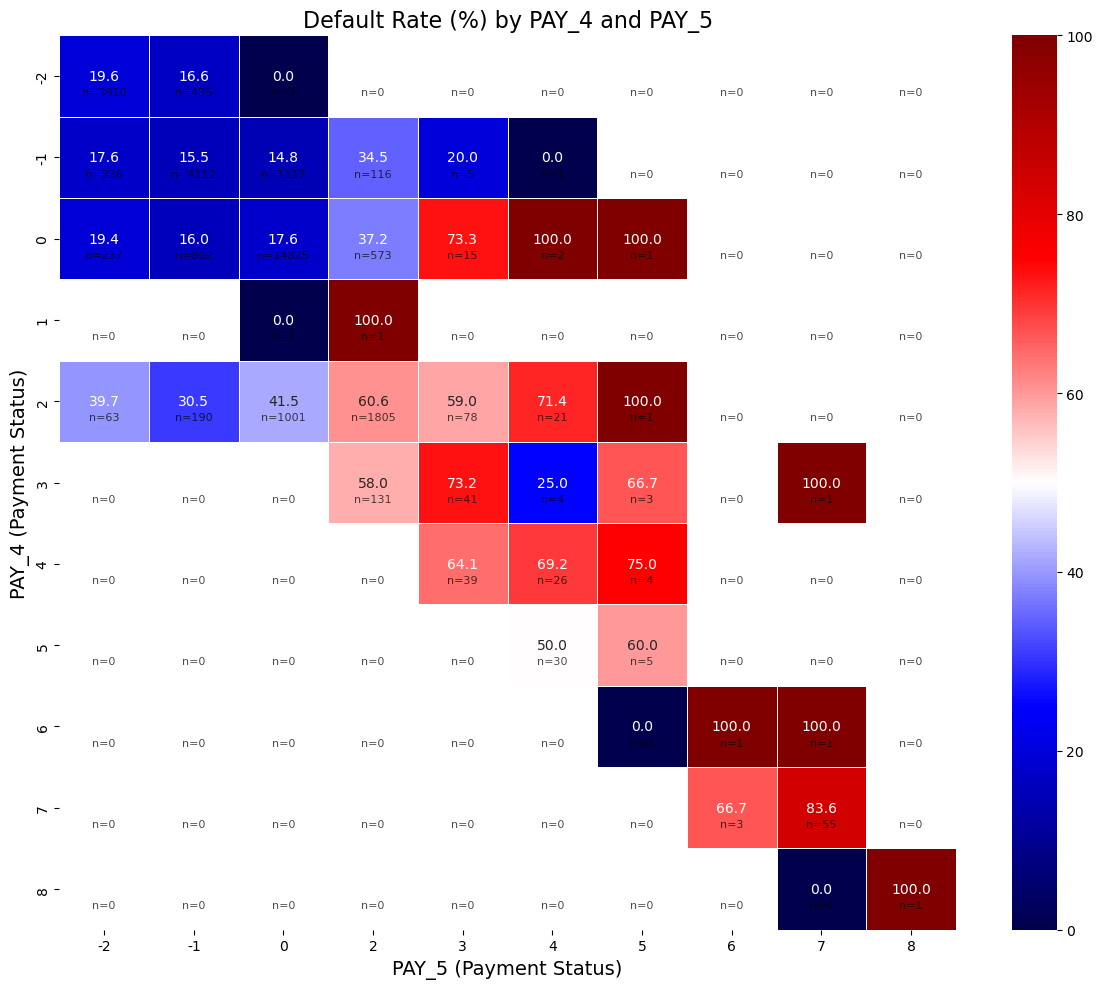

In [12]:
create_default_rate_heatmap(dataset, 'PAY_5', 'PAY_6')
plt.savefig('default_rate_heatmap_pay5_pay6.png')
plt.show()

create_default_rate_heatmap(dataset, 'PAY_4', 'PAY_5')
plt.savefig('default_rate_heatmap_pay4_pay5.png')
plt.show()

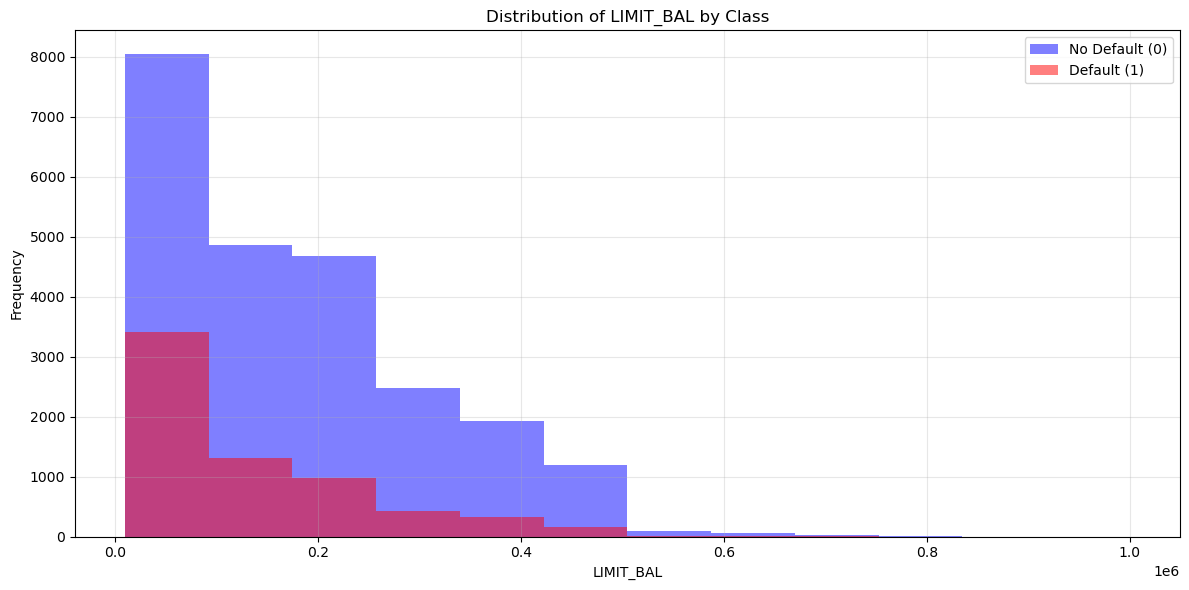

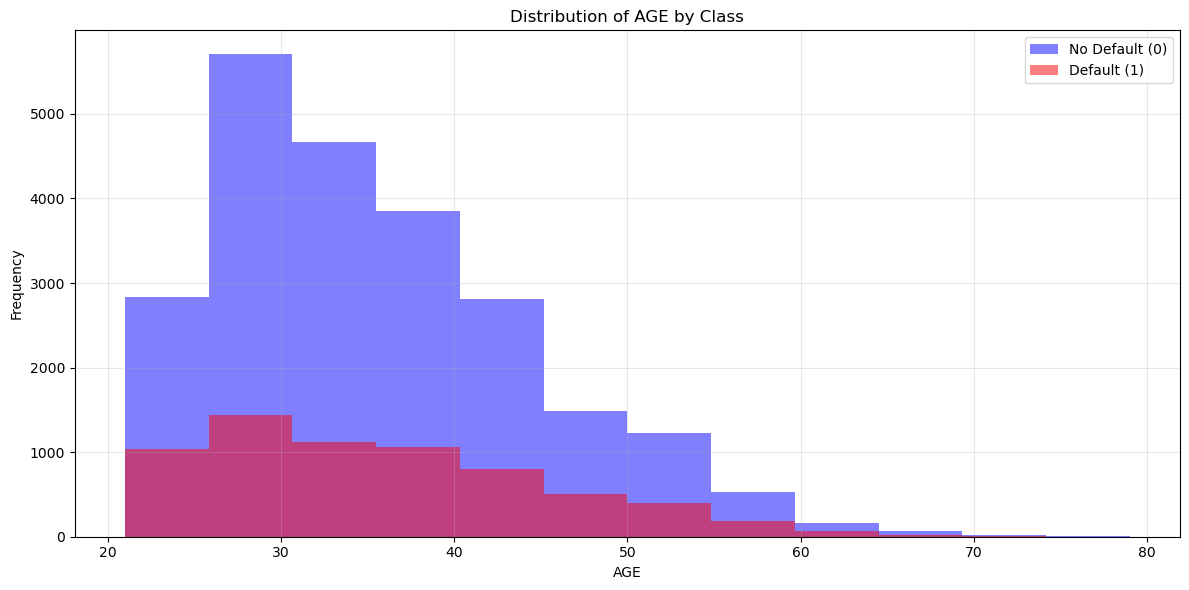

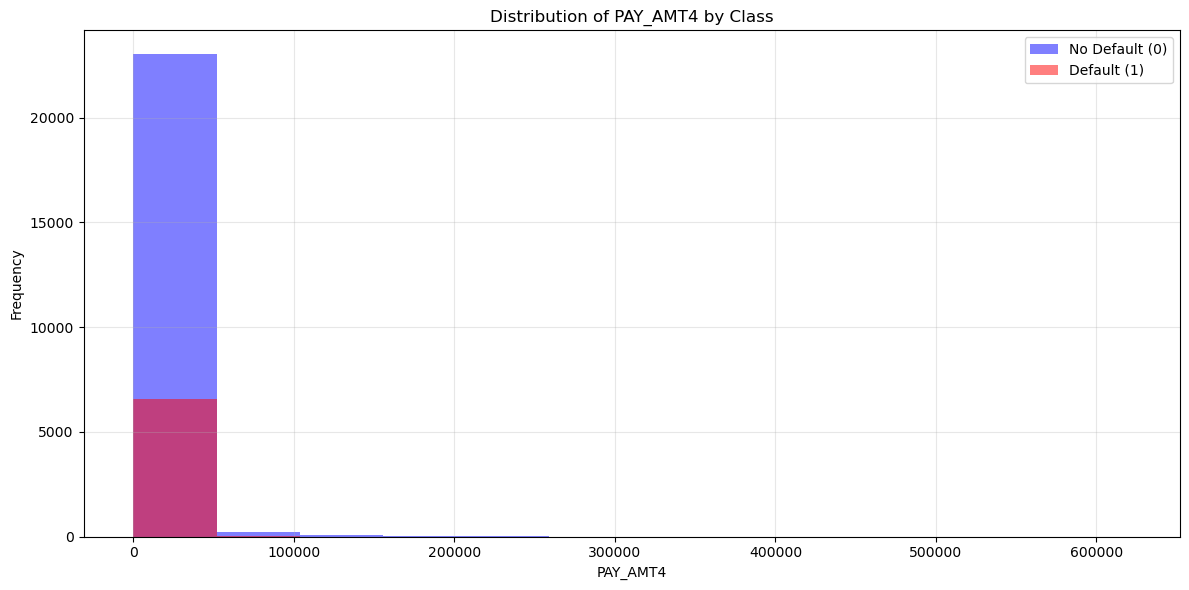

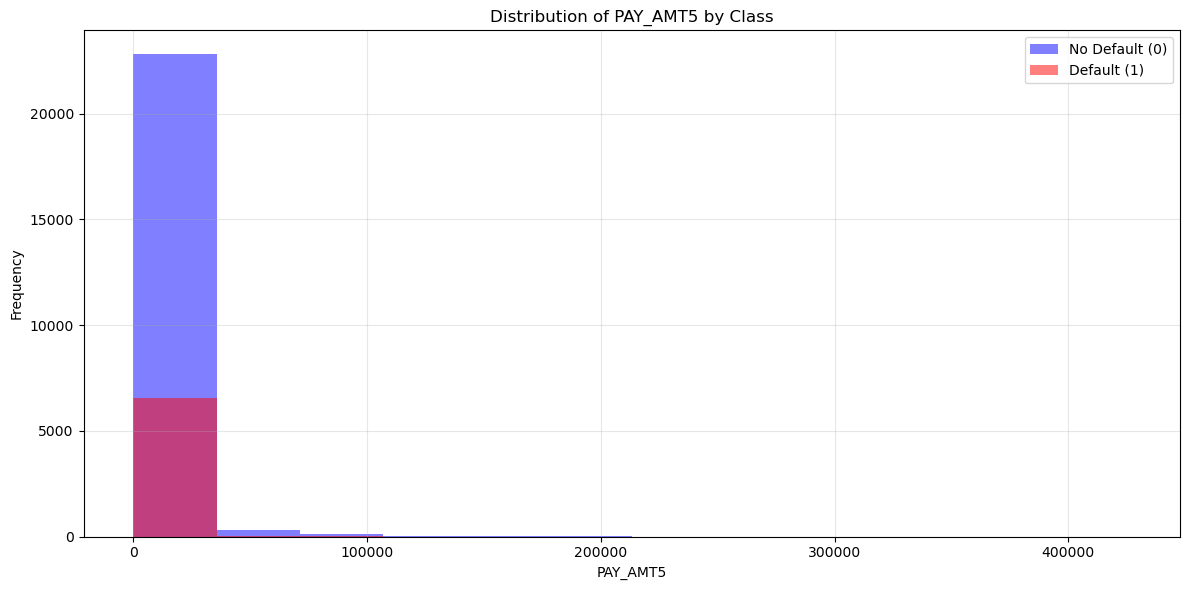

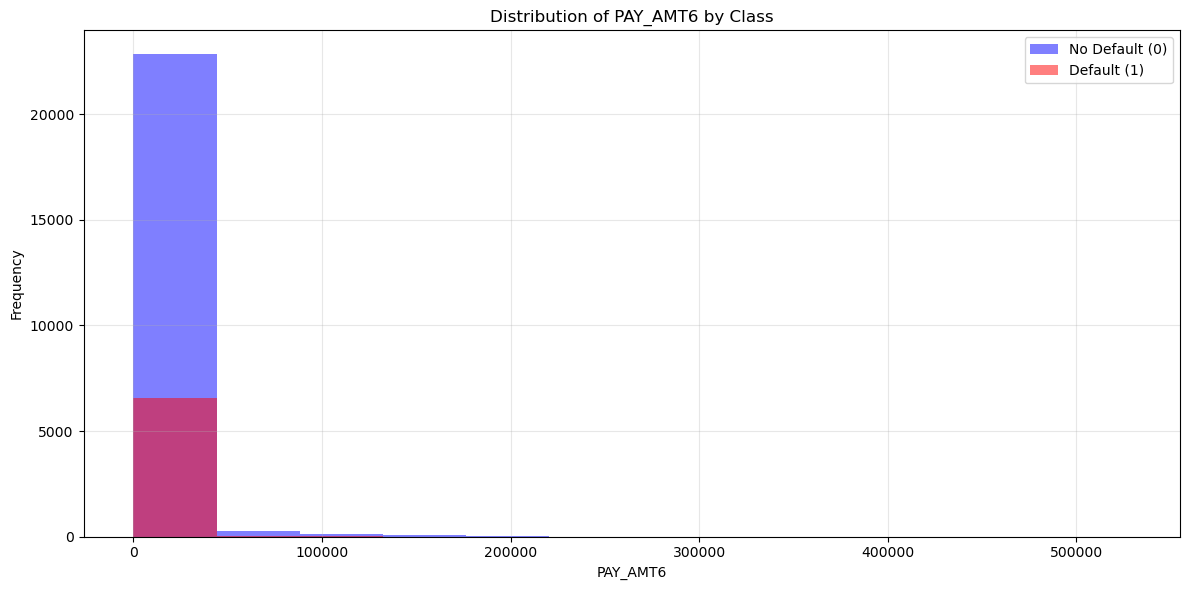

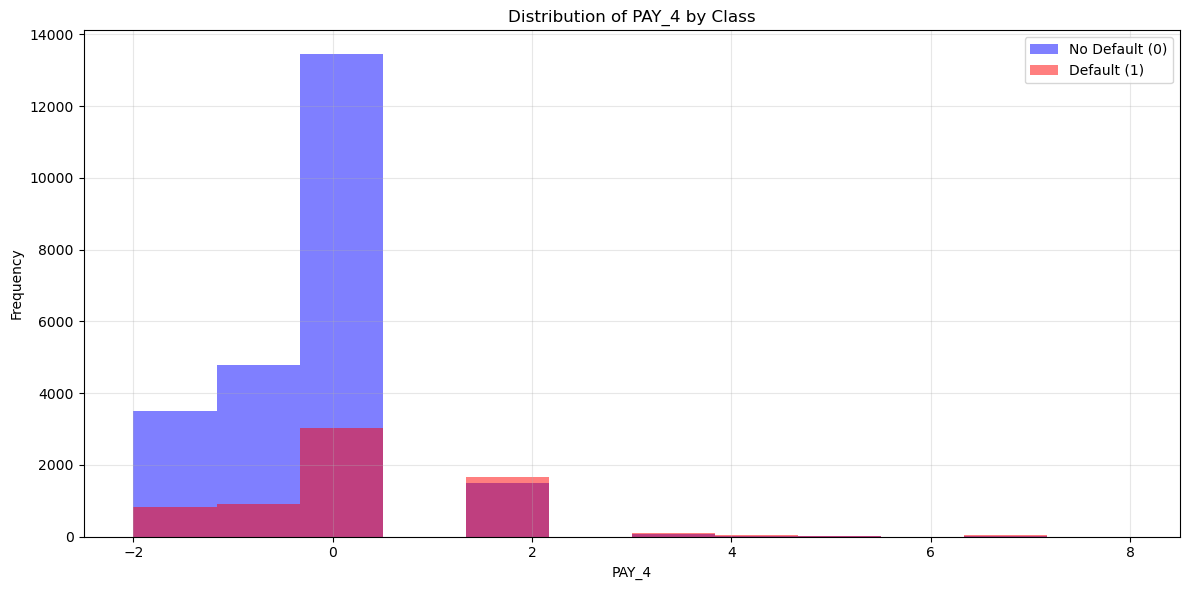

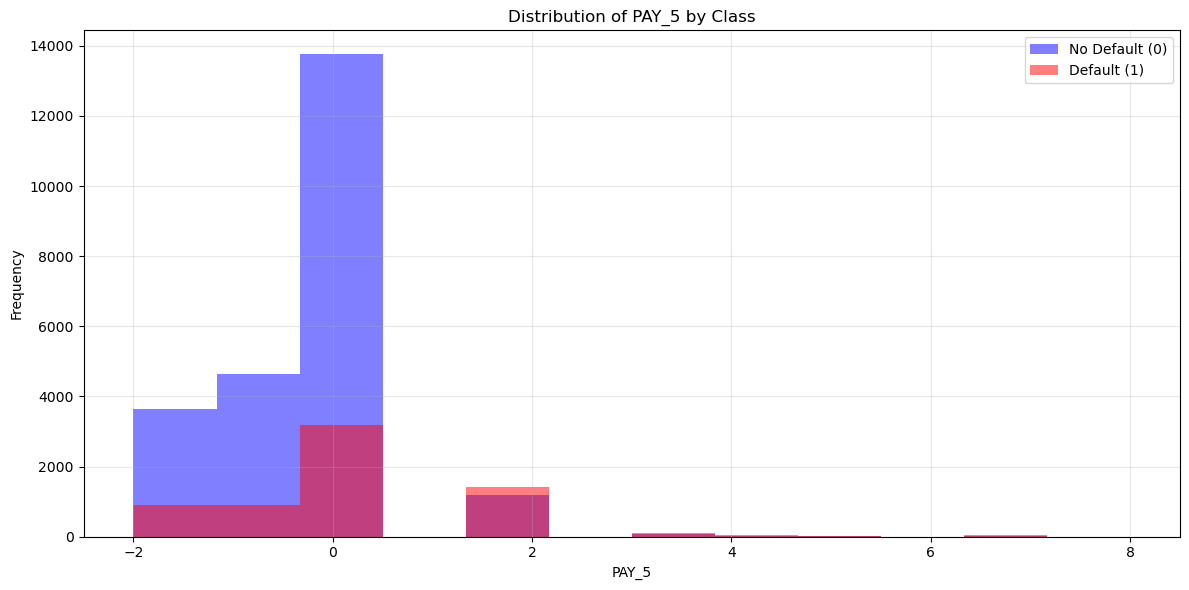

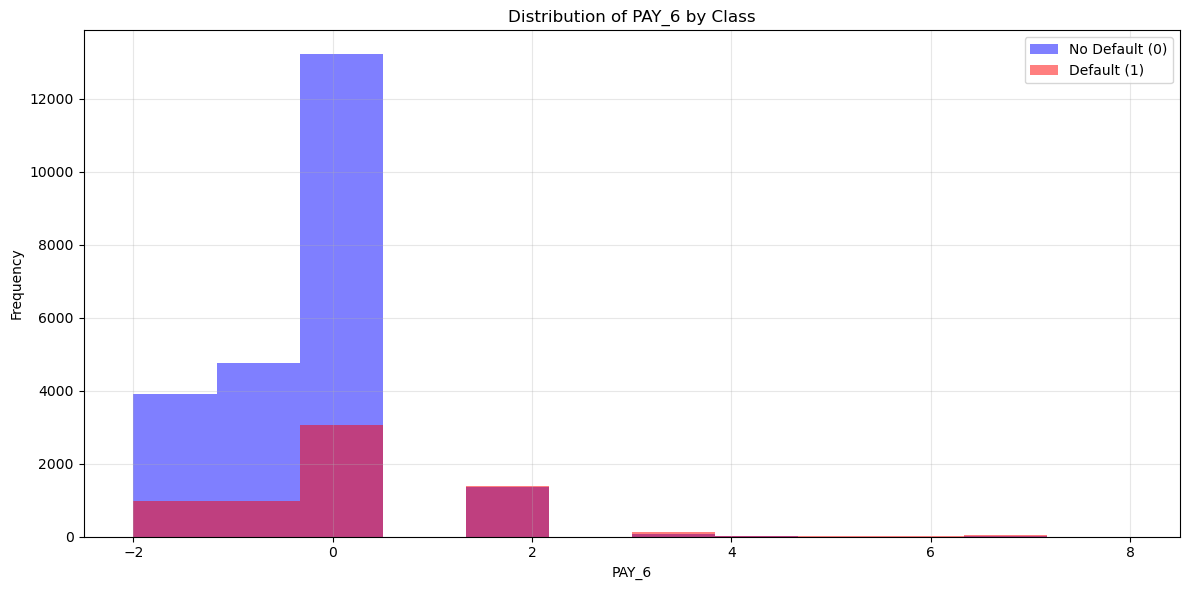

In [13]:
create_class_histogram(dataset, 'LIMIT_BAL', bins=12)
plt.show()

create_class_histogram(dataset, 'AGE', bins=12)
plt.show()

create_class_histogram(dataset, 'PAY_AMT4', bins=12)
plt.show()

create_class_histogram(dataset, 'PAY_AMT5', bins=12)
plt.show()

create_class_histogram(dataset, 'PAY_AMT6', bins=12)
plt.show()

create_class_histogram(dataset, 'PAY_4', bins=12)
plt.show()

create_class_histogram(dataset, 'PAY_5', bins=12)
plt.show()

create_class_histogram(dataset, 'PAY_6', bins=12)
plt.show()

The analysis of class separation histograms for some of our features shows that the PAY_AMT features are not very useful to separate the two classes. As expected we can see that PAY features are very similar between them. lIMIT_BAL and AGE features are also not very useful to separate the two classes. However, we can see that the default rate is higher for older people and for people with higher credit limits. This is a bit counter-intuitive because we would expect that older people are more responsible with their credit cards.

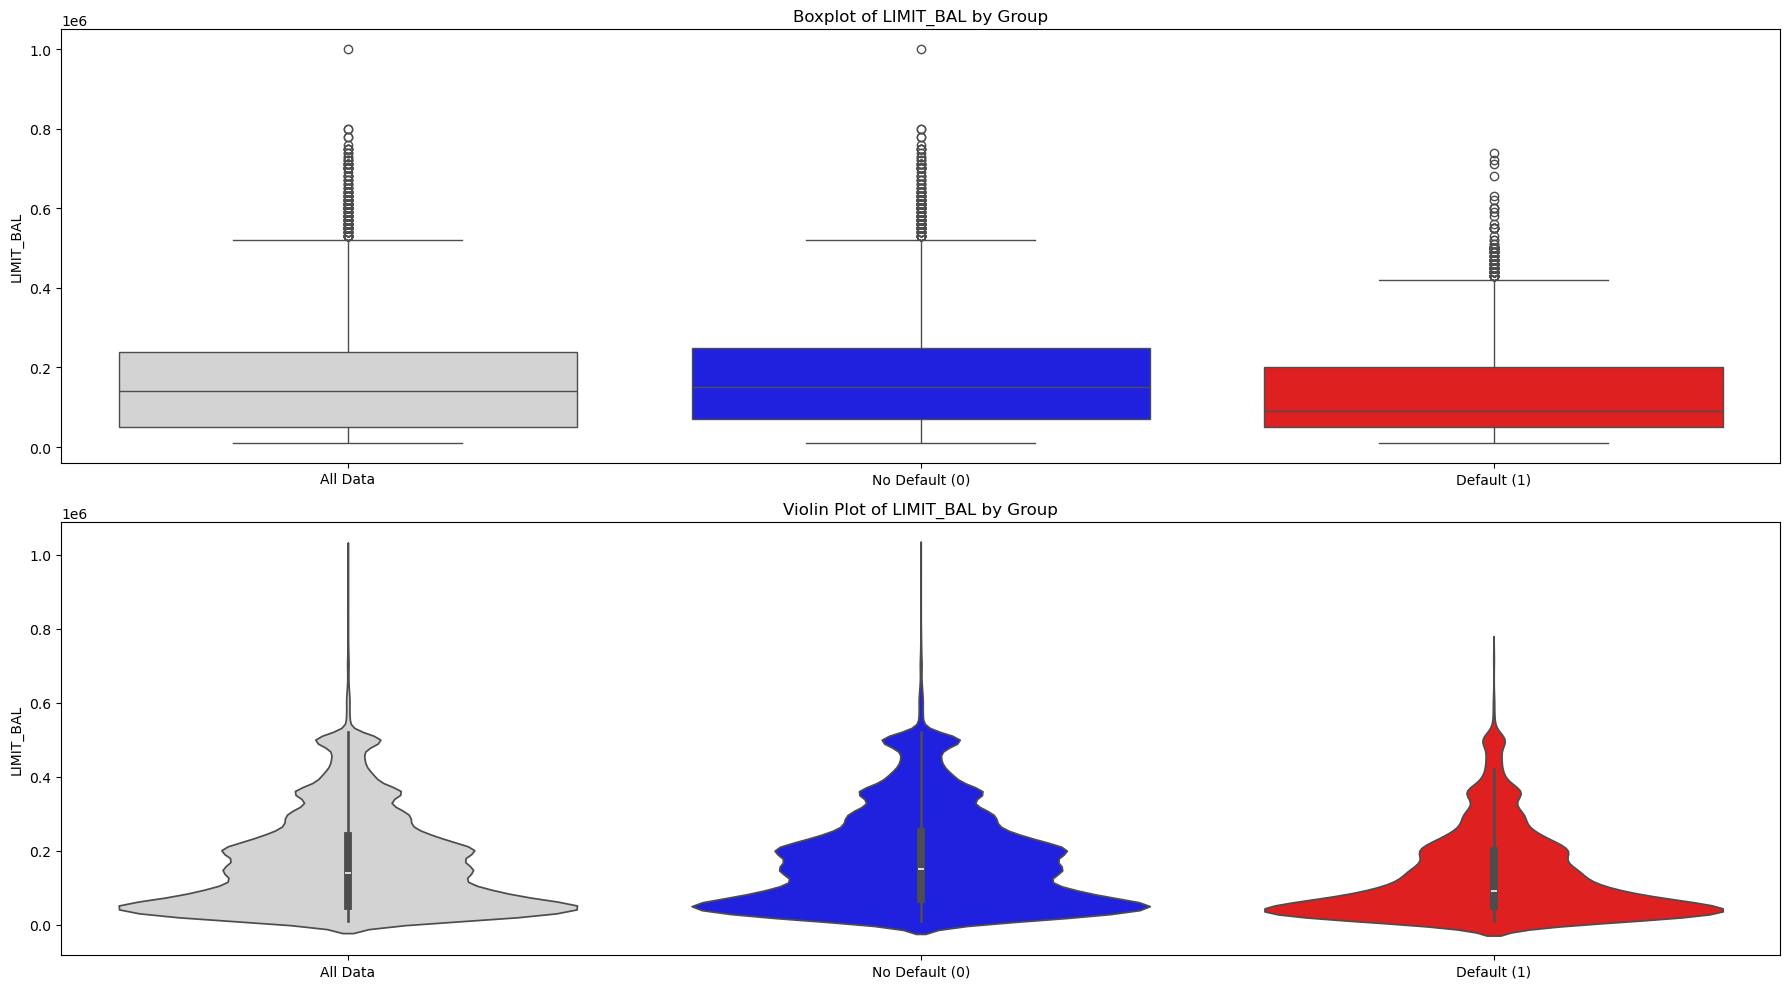

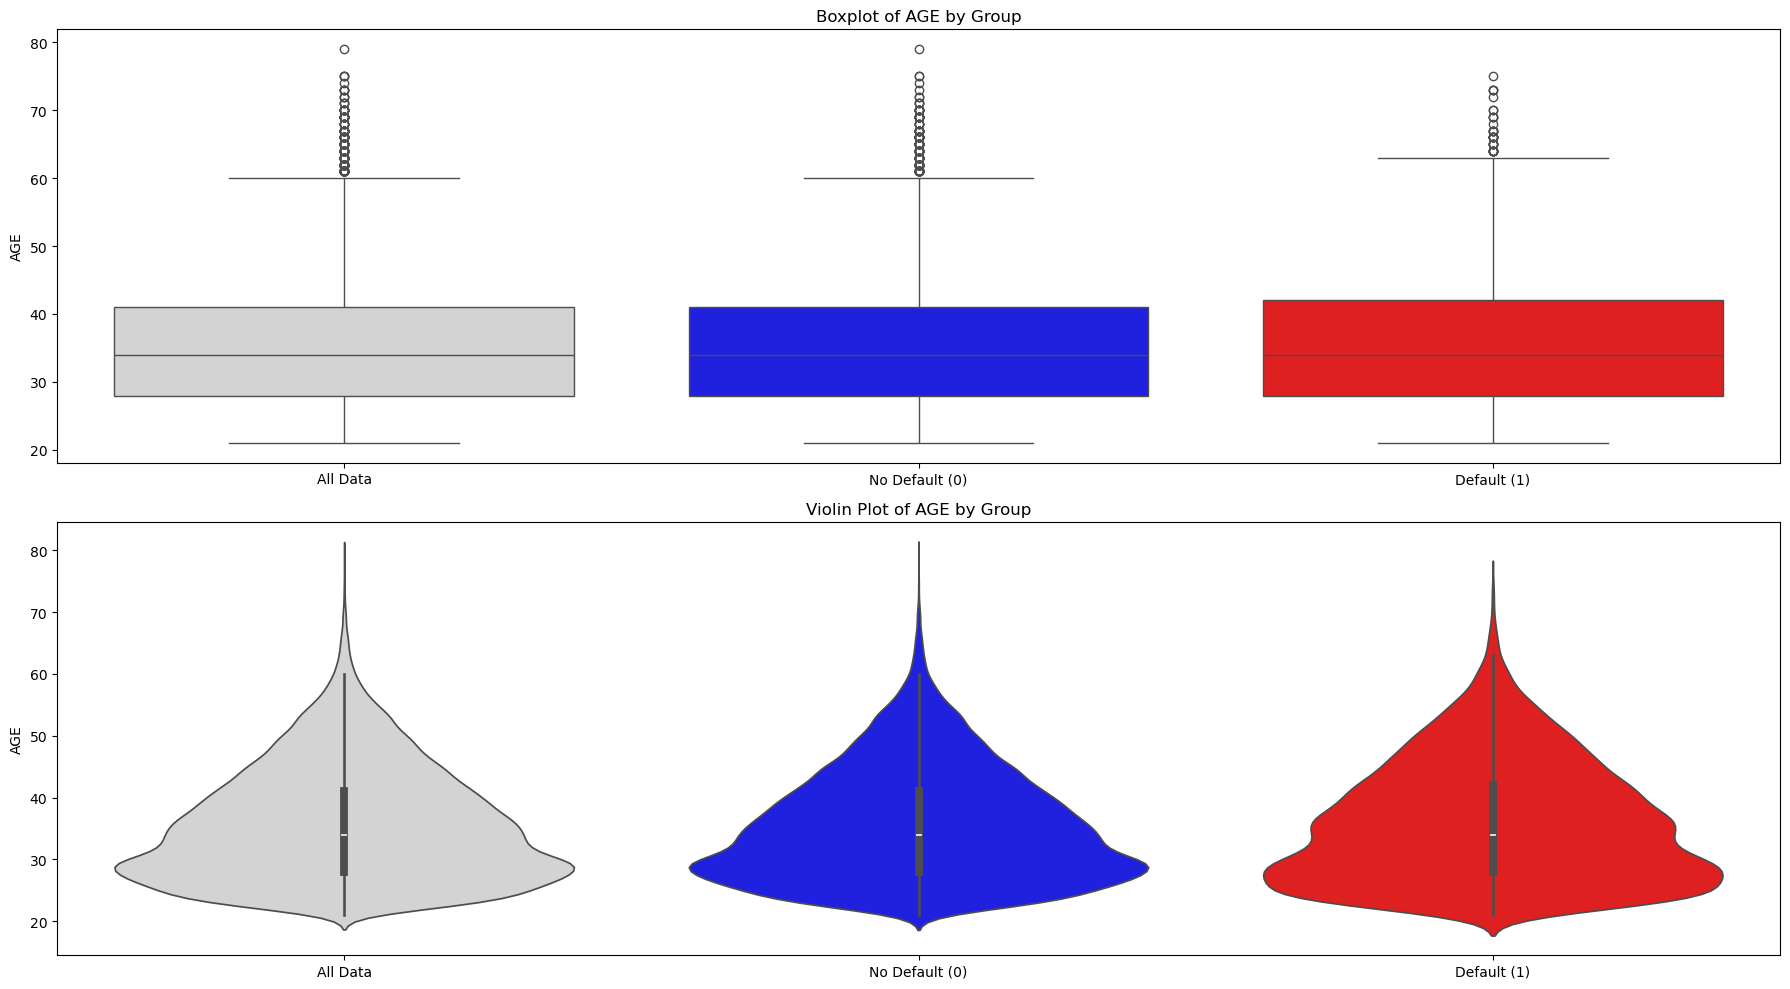

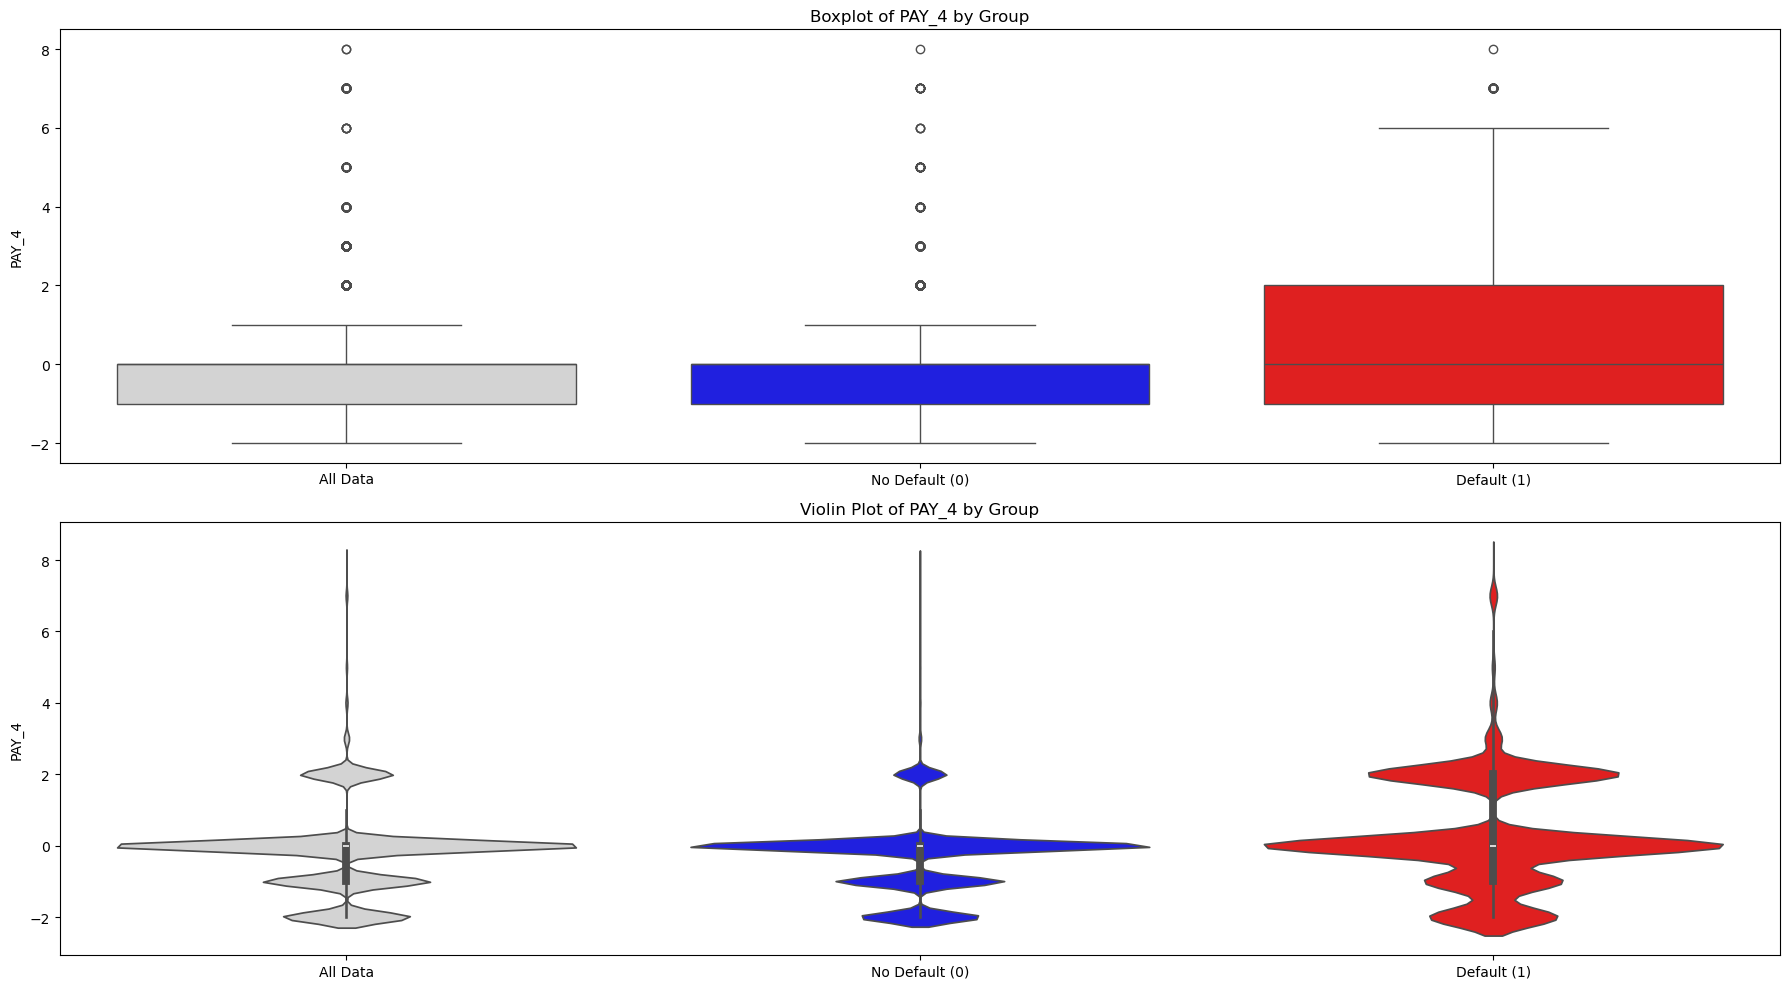

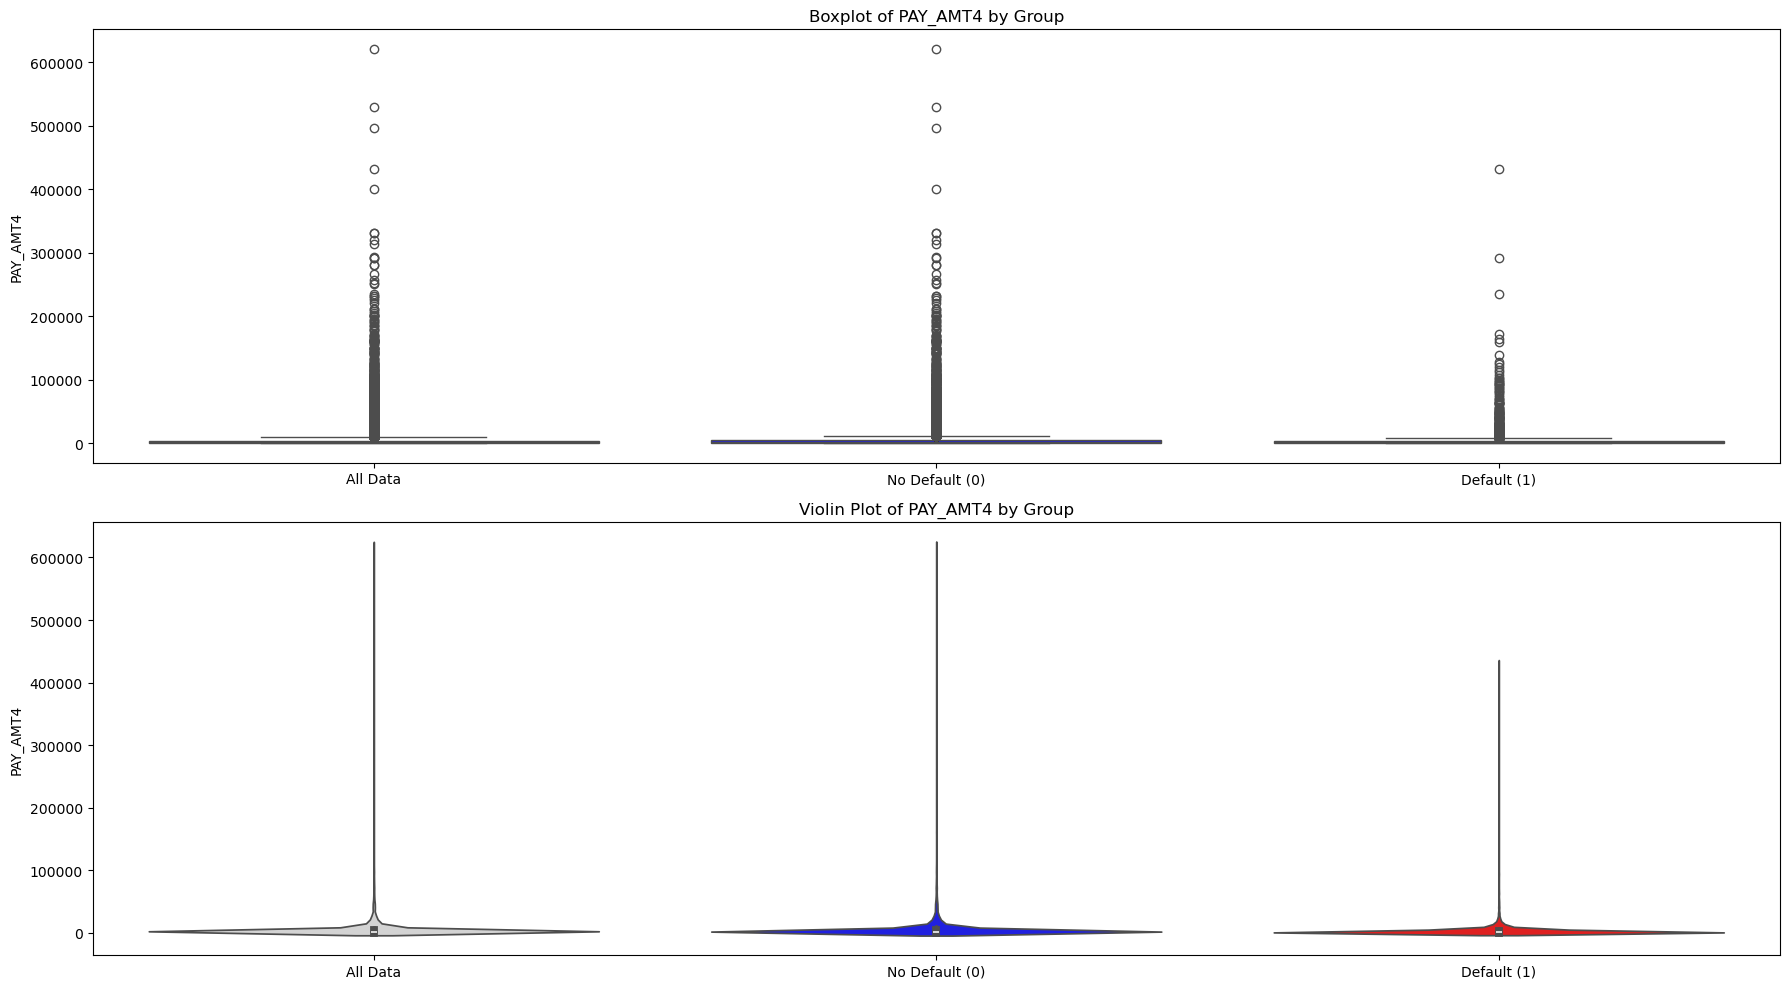

In [14]:
show_feature_distribution(dataset, 'LIMIT_BAL')
plt.show()

show_feature_distribution(dataset, 'AGE')
plt.show()

show_feature_distribution(dataset, 'PAY_4')
plt.show()

show_feature_distribution(dataset, 'PAY_AMT4')
plt.show()

In [15]:
limit_bal_stats = calculate_statistics(dataset, 'LIMIT_BAL')
print("Statistics for LIMIT_BAL:")
print(limit_bal_stats)

pay4_stats = calculate_statistics(dataset, 'AGE')
print("Statistics for AGE:")
print(pay4_stats)

pay4_stats = calculate_statistics(dataset, 'PAY_6')
print("Statistics for PAY_6:")
print(pay4_stats)

pay5_stats = calculate_statistics(dataset, 'PAY_AMT6')
print("Statistics for PAY_AMT6:")
print(pay5_stats)

Statistics for LIMIT_BAL:
   Statistic       Class 0       Class 1
0      Count  2.336400e+04  6.636000e+03
1       Mean  1.780997e+05  1.301097e+05
2     Median  1.500000e+05  9.000000e+04
3       Mode  5.000000e+04  5.000000e+04
4    Std Dev  1.316255e+05  1.153698e+05
5   Variance  1.732528e+10  1.331020e+10
6        Min  1.000000e+04  1.000000e+04
7        25%  7.000000e+04  5.000000e+04
8        50%  1.500000e+05  9.000000e+04
9        75%  2.500000e+05  2.000000e+05
10       Max  1.000000e+06  7.400000e+05
11  Skewness  9.123958e-01  1.351419e+00
12  Kurtosis  3.756551e-01  1.554465e+00
Statistics for AGE:
   Statistic       Class 0      Class 1
0      Count  23364.000000  6636.000000
1       Mean     35.417266    35.725738
2     Median     34.000000    34.000000
3       Mode     29.000000    27.000000
4    Std Dev      9.077160     9.692708
5   Variance     82.394841    93.948590
6        Min     21.000000    21.000000
7        25%     28.000000    28.000000
8        50%     34.

Part 2 Unsupervised Machine learning

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch


In [17]:
import pandas as pd
df = pd.read_csv("UCI_Credit_Card.csv")
df = df.drop("ID", axis=1)
columns_to_drop = [
    "PAY_0", "PAY_2", "PAY_3",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3"
]
df = df.drop(columns=columns_to_drop)
X = df.drop("default.payment.next.month", axis=1)
y = df["default.payment.next.month"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Data loaded and processed successfully.")
print("Feature matrix shape:", X_scaled.shape)


✅ Data loaded and processed successfully.
Feature matrix shape: (30000, 14)


In [18]:
print("📊 K-Means Clustering Silhouette Scores:")
k_range = range(2, 7)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"  - k = {k}: Silhouette Score = {score:.3f}")


📊 K-Means Clustering Silhouette Scores:
  - k = 2: Silhouette Score = 0.320
  - k = 3: Silhouette Score = 0.175
  - k = 4: Silhouette Score = 0.153
  - k = 5: Silhouette Score = 0.168
  - k = 6: Silhouette Score = 0.167


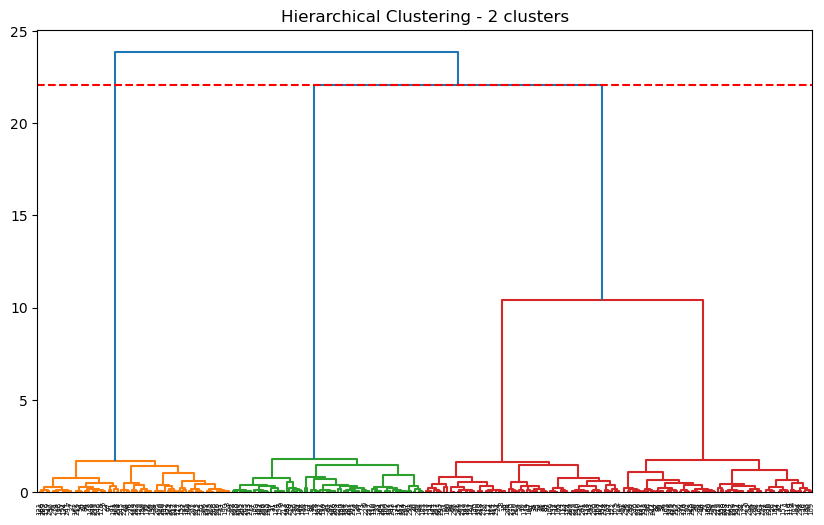

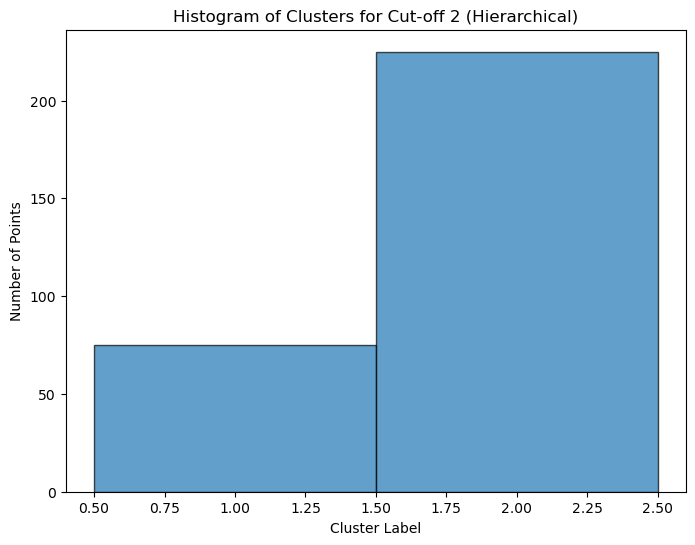

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# Generate synthetic dataset (use your actual data if available)
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Standardize the dataset for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering with 'ward' linkage
Z = linkage(X_scaled, method='ward')

# Experiment 1: Cut-off at 2 clusters
clusters_1 = fcluster(Z, t=2, criterion='maxclust')

# Plot dendrogram for 2 clusters
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.axhline(y=Z[-2, 2], color='r', linestyle='--')  # Cut-off line for 2 clusters
plt.title('Hierarchical Clustering - 2 clusters')
plt.show()

# Create a histogram for the number of points in each cluster
plt.figure(figsize=(8, 6))
plt.hist(clusters_1, bins=np.arange(1, np.max(clusters_1) + 2) - 0.5, edgecolor='black', alpha=0.7)
plt.title('Histogram of Clusters for Cut-off 2 (Hierarchical)')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.show()



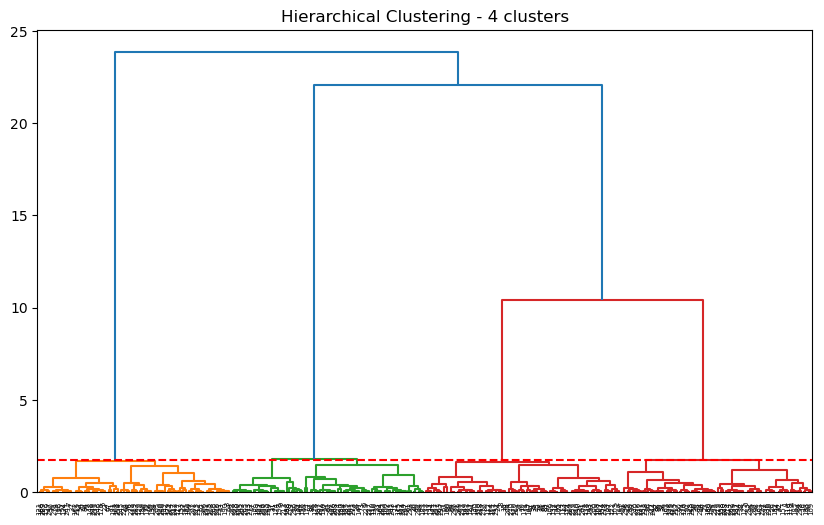

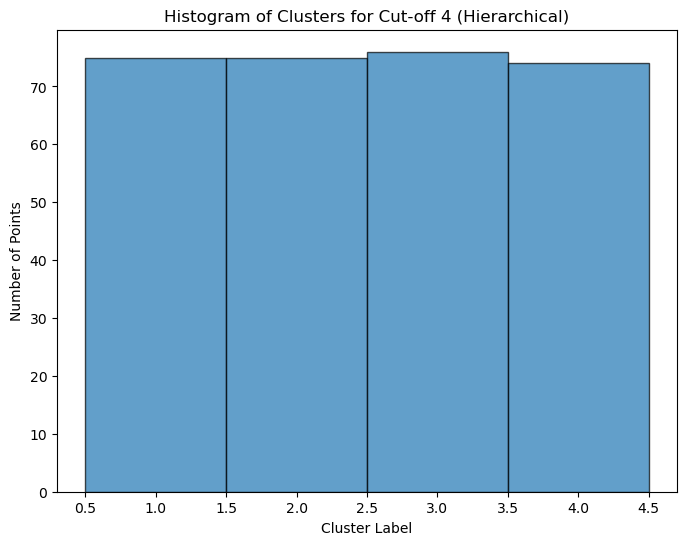

In [28]:
# Experiment 2: Cut-off at 4 clusters
clusters_2 = fcluster(Z, t=4, criterion='maxclust')

# Plot dendrogram for 4 clusters
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.axhline(y=Z[-5, 2], color='r', linestyle='--')  # Cut-off line for 4 clusters
plt.title('Hierarchical Clustering - 4 clusters')
plt.show()

# Create a histogram for the number of points in each cluster
plt.figure(figsize=(8, 6))
plt.hist(clusters_2, bins=np.arange(1, np.max(clusters_2) + 2) - 0.5, edgecolor='black', alpha=0.7)
plt.title('Histogram of Clusters for Cut-off 4 (Hierarchical)')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.show()


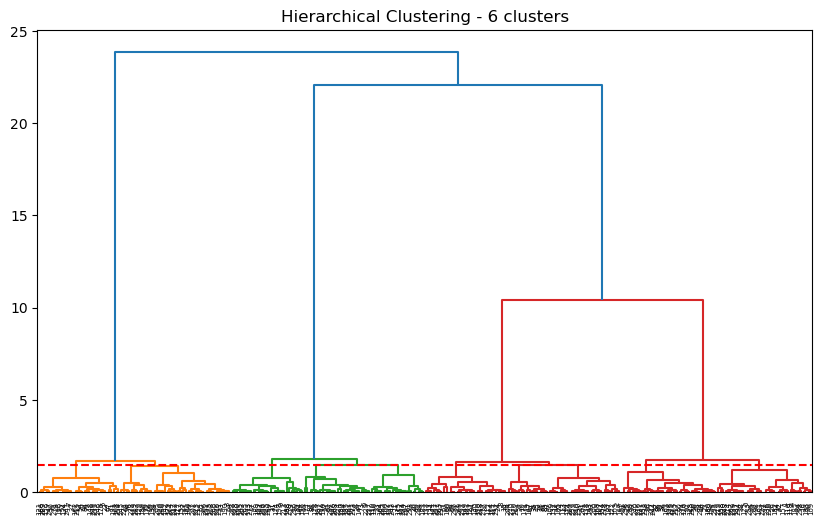

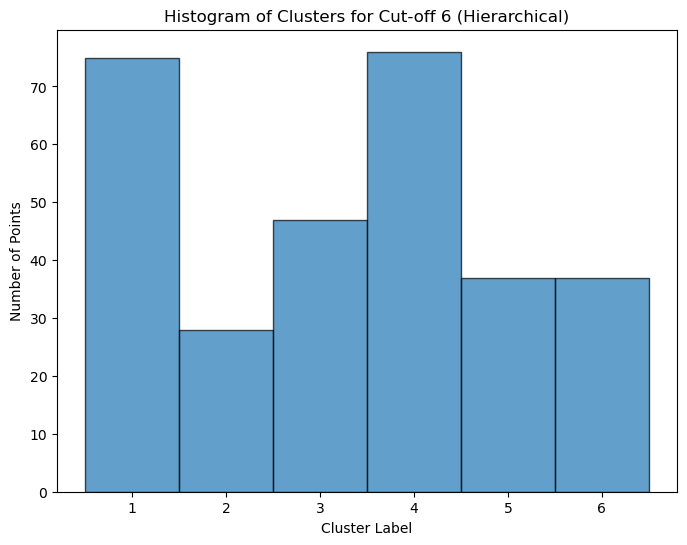

In [29]:
# Experiment 3: Cut-off at 6 clusters
clusters_3 = fcluster(Z, t=6, criterion='maxclust')

# Plot dendrogram for 6 clusters
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.axhline(y=Z[-8, 2], color='r', linestyle='--')  # Cut-off line for 6 clusters
plt.title('Hierarchical Clustering - 6 clusters')
plt.show()

# Create a histogram for the number of points in each cluster
plt.figure(figsize=(8, 6))
plt.hist(clusters_3, bins=np.arange(1, np.max(clusters_3) + 2) - 0.5, edgecolor='black', alpha=0.7)
plt.title('Histogram of Clusters for Cut-off 6 (Hierarchical)')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Silhouette Score for k=2: 0.55773379731114
Silhouette Score for k=3: 0.743594601645247
Silhouette Score for k=4: 0.7974739889632732
Silhouette Score for k=5: 0.6742245911933695
Silhouette Score for k=6: 0.5513465668253311


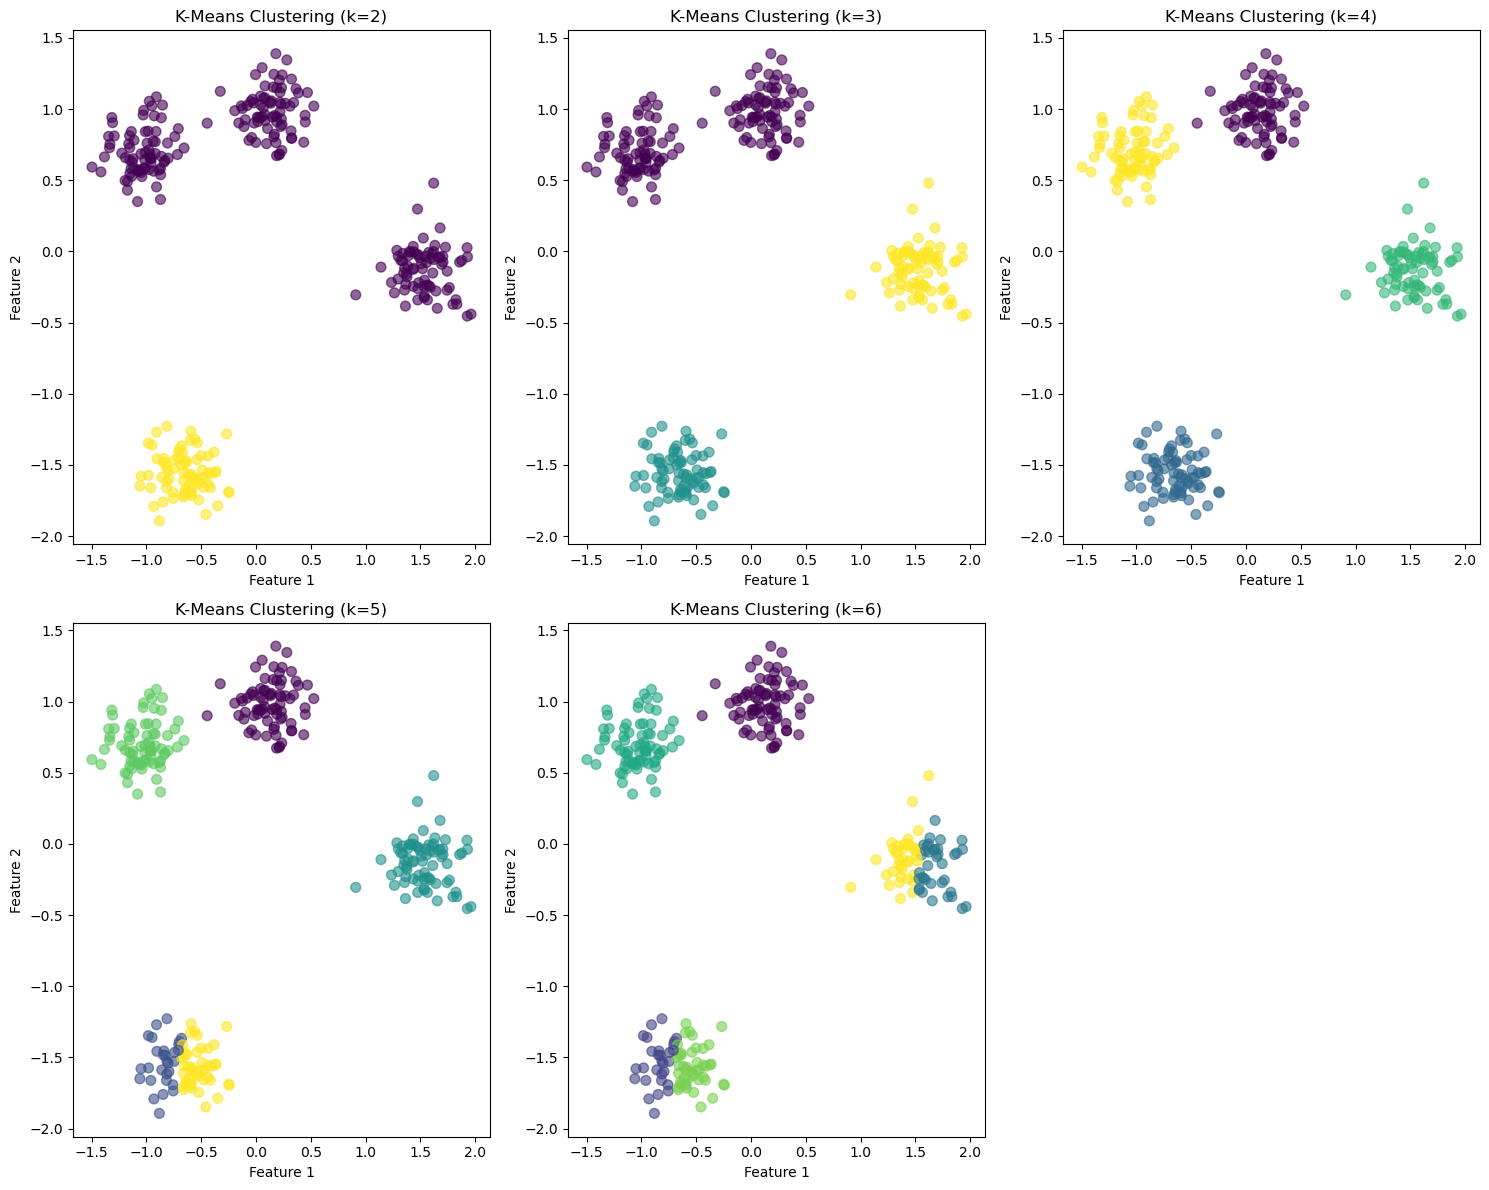

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# List of k values to try
k_values = [2, 3, 4, 5, 6]

# Store silhouette scores
sil_scores = []

# Plotting K-means clustering results for each k
plt.figure(figsize=(15, 12))

for i, k in enumerate(k_values, start=1):
    # Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_

    # Plot clusters for current k
    plt.subplot(2, 3, i)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(f'K-Means Clustering (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Compute silhouette score
    sil_score = silhouette_score(X_scaled, cluster_labels)
    sil_scores.append(sil_score)
    print(f"Silhouette Score for k={k}: {sil_score}")

# Show K-Means clustering results
plt.tight_layout()
plt.show()



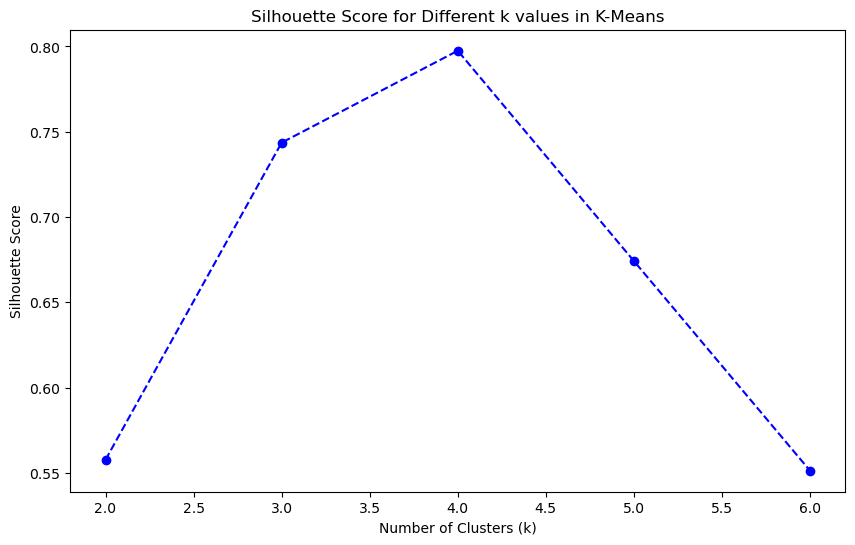

In [31]:
# Plot Silhouette Scores to analyze performance
plt.figure(figsize=(10, 6))
plt.plot(k_values, sil_scores, marker='o', color='b', linestyle='--')
plt.title('Silhouette Score for Different k values in K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [32]:
print("\n🔗 Agglomerative Clustering Silhouette Scores (Ward Linkage):")



for n_clusters in [2, 4, 6]:
    agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agg.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"  - n_clusters = {n_clusters}: Silhouette Score = {score:.3f}")


🔗 Agglomerative Clustering Silhouette Scores (Ward Linkage):
  - n_clusters = 2: Silhouette Score = 0.558
  - n_clusters = 4: Silhouette Score = 0.797
  - n_clusters = 6: Silhouette Score = 0.554


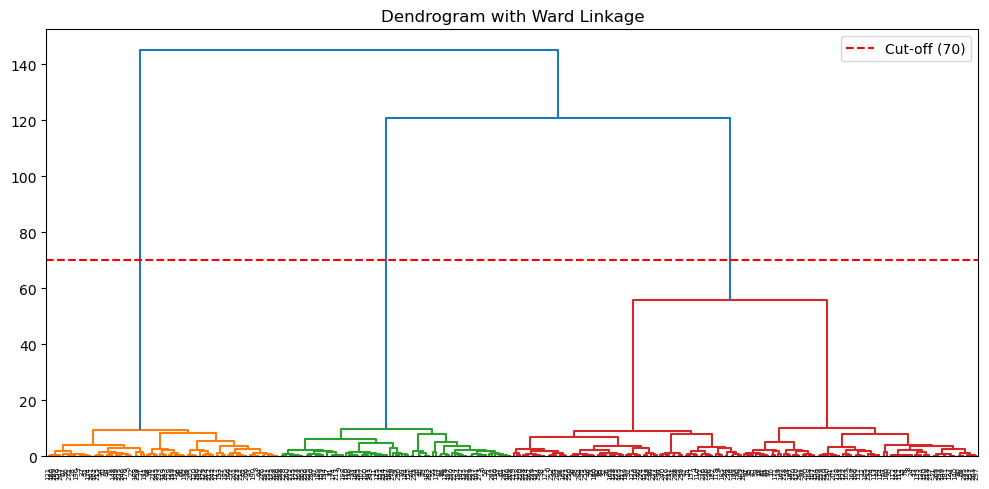

In [33]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform linkage
linked = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.axhline(y=70, color='r', linestyle='--', label='Cut-off (70)')
plt.title('Dendrogram with Ward Linkage')
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
# Load dataset
df = pd.read_csv("UCI_Credit_Card.csv")

# Drop ID column
df = df.drop("ID", axis=1)

# Drop 9 columns to reduce to 15 features
cols_to_drop = [
    "PAY_0", "PAY_2", "PAY_3",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3"
]
df = df.drop(columns=cols_to_drop)

# Features and target
X = df.drop("default.payment.next.month", axis=1)
y = df["default.payment.next.month"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

print("✅ Data prepared and split.")


✅ Data prepared and split.


In [22]:
# Experiment 1: basic settings
ann1 = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', max_iter=350, random_state=42)
ann1.fit(X_train, y_train)
y_pred1 = ann1.predict(X_test)
print("\n ANN Experiment 1")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

# Experiment 2: more neurons and one more layer
ann2 = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=500, random_state=42)
ann2.fit(X_train, y_train)
y_pred2 = ann2.predict(X_test)
print("\n ANN Experiment 2")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

# Experiment 3: using tanh activation and different solver
ann3 = MLPClassifier(hidden_layer_sizes=(64,), activation='tanh', solver='adam',
                     max_iter=1000, random_state=42)
ann3.fit(X_train, y_train)

y_pred3 = ann3.predict(X_test)
print("\n ANN Experiment 3")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))



 ANN Experiment 1
Accuracy: 0.7957333333333333
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      5873
           1       0.58      0.21      0.30      1627

    accuracy                           0.80      7500
   macro avg       0.70      0.58      0.59      7500
weighted avg       0.76      0.80      0.76      7500


 ANN Experiment 2
Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.81      0.90      0.86      5873
           1       0.41      0.24      0.30      1627

    accuracy                           0.76      7500
   macro avg       0.61      0.57      0.58      7500
weighted avg       0.72      0.76      0.74      7500


 ANN Experiment 3
Accuracy: 0.7878666666666667
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      5873
           1       0.53      0.20      0.29      1627

    accuracy                           0.79      750

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Load the dataset
df = pd.read_csv("UCI_Credit_Card.csv")  # Assuming file is in the current directory
df = df.drop("ID", axis=1)

# Drop selected features to reduce to 15
cols_to_drop = [
    "PAY_0", "PAY_2", "PAY_3",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3"
]
df = df.drop(columns=cols_to_drop)

# Separate features and target
X = df.drop("default.payment.next.month", axis=1)
y = df["default.payment.next.month"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

print("✅ Logistic Regression: Data ready.")


✅ Logistic Regression: Data ready.


In [24]:
# Experiment 1: Default settings
logreg1 = LogisticRegression(random_state=42, max_iter=200)
logreg1.fit(X_train, y_train)
y_pred1 = logreg1.predict(X_test)

print("\n🔍 Logistic Regression Experiment 1")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

# Experiment 2: Increase regularization strength (C = 0.1)
logreg2 = LogisticRegression(C=0.1, random_state=42, max_iter=200)
logreg2.fit(X_train, y_train)
y_pred2 = logreg2.predict(X_test)

print("\n🔍 Logistic Regression Experiment 2")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

# Experiment 3: Use different solver
logreg3 = LogisticRegression(solver='saga', penalty='l2', random_state=42, max_iter=300)
logreg3.fit(X_train, y_train)
y_pred3 = logreg3.predict(X_test)

print("\n🔍 Logistic Regression Experiment 3")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))



🔍 Logistic Regression Experiment 1
Accuracy: 0.7873333333333333
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      5873
           1       0.58      0.07      0.12      1627

    accuracy                           0.79      7500
   macro avg       0.69      0.53      0.50      7500
weighted avg       0.75      0.79      0.72      7500


🔍 Logistic Regression Experiment 2
Accuracy: 0.7873333333333333
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      5873
           1       0.58      0.07      0.12      1627

    accuracy                           0.79      7500
   macro avg       0.69      0.53      0.50      7500
weighted avg       0.75      0.79      0.72      7500


🔍 Logistic Regression Experiment 3
Accuracy: 0.7874666666666666
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      5873
           1       0.59      0.07      0.1

In [25]:
# Load the UCI Credit Card dataset
df = pd.read_csv("UCI_Credit_Card.csv")

# Drop ID column - not a useful feature for learning
df = df.drop("ID", axis=1)

# Drop some correlated features to reduce dimensionality
cols_to_drop = [
    "PAY_0", "PAY_2", "PAY_3",  # payment history
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3",  # bill amounts
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3"  # payment amounts
]
df = df.drop(columns=cols_to_drop)

# Separate features (X) and target (y)
X = df.drop("default.payment.next.month", axis=1)
y = df["default.payment.next.month"]

# Normalize the feature values (important for kNN distance calculations)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42)

print("✅ Dataset ready for kNN classification.")


✅ Dataset ready for kNN classification.


In [26]:
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn1 = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)  # p=2 → Euclidean
knn1.fit(X_train, y_train)
y_pred1 = knn1.predict(X_test)

print("\n🔍 kNN Experiment 1: k=3, Euclidean Distance")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))
knn2 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')  # Manhattan distance (p=1)
knn2.fit(X_train, y_train)
y_pred2 = knn2.predict(X_test)

print("\n🔍 kNN Experiment 2: k=5, Manhattan Distance")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
knn3 = KNeighborsClassifier(n_neighbors=7, weights='distance')  # closer neighbors weigh more
knn3.fit(X_train, y_train)
y_pred3 = knn3.predict(X_test)

print("\n🔍 kNN Experiment 3: k=7, Weighted Distance")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))



🔍 kNN Experiment 1: k=3, Euclidean Distance
Accuracy: 0.7492
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      5873
           1       0.39      0.27      0.32      1627

    accuracy                           0.75      7500
   macro avg       0.60      0.57      0.58      7500
weighted avg       0.72      0.75      0.73      7500


🔍 kNN Experiment 2: k=5, Manhattan Distance
Accuracy: 0.7653333333333333
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      5873
           1       0.43      0.23      0.30      1627

    accuracy                           0.77      7500
   macro avg       0.62      0.57      0.58      7500
weighted avg       0.73      0.77      0.74      7500


🔍 kNN Experiment 3: k=7, Weighted Distance
Accuracy: 0.7748
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      5873
           1       0.46      0.25      0